
# " Who's next after Ramos??

![Ramos](https://e00-marca.uecdn.es/assets/multimedia/imagenes/2019/12/30/15777360639399.jpg)

#### A Real Madrid without Sergio Ramos is on the horizon.

This reality is hard to image. Ramos has cemented himself as an irreplaceable player with legendary status. He’s represented the crest in 635 games* and has developed into a versatile centre-back with outstanding leadership qualities. Though his contributions to the club don’t just stop there.

Despite being a defender, Ramos also has a knack for scoring goals (especially in dire moments like against Osasuna). He has 90 goals* and 38 assists* during his time with Real which is an added testament to his importance as a player. The last minute header against Atletico Madrid in the Champions League final surely takes the cake.

![Champions League Final'14](https://www.futaa.com/images/full/SergioRamos.jpeg)





#### Problem: Identifying the replacement options for a given budget

#### Task: Build a simulator to present in front of Board members- with budget (buy-out & wages), potential (deep down analysis), defending ratings, buy-out amount, rankings, (main) foot adjustment capabilities

#### Data: Fifa 19(official data) has been provided. Assuming that the ratings/wages/value/buy-out are static (stays constant for a given time)


#### Step 1: Data preprocessing & Feature engineering
#### Step 2: EDA
#### Step 3: Modeling
#### Step 4: Simulator (on Power BI, link will be updated soon)

Note: I've tried not to delete the cells in EDA as it is a journey and there are numerous iterations done before coming to a final/ desired set of insights. 

*** Please feel free to point out any mistakes or any efficent methods of performing any task of this journey. Also, if you like my work- do give it a like as it will motivate to build more cases.***


### Let's get started................................

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
# Importing file
# File Name

import os
print(os.listdir("input/"))

# OR

# File Path
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


        
df = pd.read_csv("input/data.csv")
df.head()

['data.csv']
input/data.csv


Unnamed: 0      ID               Name  Age                                           Photo Nationality                                 Flag  Overall  Potential                 Club                                     Club Logo    Value   Wage  Special Preferred Foot  International Reputation  Weak Foot  Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number        Joined Loaned From Contract Valid Until Height  Weight    LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  Composure  Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  \
0           0  158023           L. Messi   31  https://cdn.sofifa.org/players/4/19/158023.png   Argentina  https://cdn.sofifa.org/flags/52.png       94         94         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M  €565K     2202           Left                       5.0        4.0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   Jul 1, 2004         NaN                 2021    5'7  159lbs  88+2  88+2  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2      84.0       95.0             70.0          90.0     86.0       97.0   93.0        94.0         87.0         96.0          91.0         86.0     91.0       95.0     95.0       85.0     68.0     72.0      59.0       94.0        48.0           22.0         94.0    94.0       75.0       96.0     33.0            28.0           26.0       6.0        11.0       15.0           14.0         8.0   
1           1   20801  Cristiano Ronaldo   33   https://cdn.sofifa.org/players/4/19/20801.png    Portugal  https://cdn.sofifa.org/flags/38.png       94         94             Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M  €405K     2228          Right                       5.0        4.0          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0  Jul 10, 2018         NaN                 2022    6'2  183lbs  91+3  91+3  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3      84.0       94.0             89.0          81.0     87.0       88.0   81.0        76.0         77.0         94.0          89.0         91.0     87.0       96.0     70.0       95.0     95.0     88.0      79.0       93.0        63.0           29.0         95.0    82.0       85.0       95.0     28.0            31.0           23.0       7.0        11.0       15.0           14.0        11.0   
2           2  190871          Neymar Jr   26  https://cdn.sofifa.org/players/4/19/190871.png      Brazil  https://cdn.sofifa.org/flags/54.png       92         93  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  €118.5M  €290K     2143          Right                       5.0        5.0          5.0    High/ Medium      Neymar       Yes       LW           10.0   Aug 3, 2017         NaN                 2022    5'9  150lbs  84+3  84+3  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3      79.0       87.0             62.0          84.0     84.0       96.0   88.0        87.0         78.0         95.0          94.0         90.0     96.0       94.0     84.0       80.0     61.0     81.0      49.0       82.0        56.0           36.0         89.0    87.0       81.0       94.0     27.0            24.0           33.0       9.0         9.0       15.0           15.0        11.0   
3           3  1930

In [3]:
#Shape of dataframe
print(" Shape of dataframe: ", df.shape)

 Shape of dataframe:  (18207, 89)


There are 18206 players for which 89 features each are provided

### Data Preprocessing & Feature Engineerinhg

In [4]:
# Drop duplicates
df.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", df.shape)

 Shape of dataframe after dropping duplicates:  (18207, 89)


#### No duplicate entries

In [5]:
#Variable inspection

print("Names of columns ", list(df.columns))

Names of columns  ['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', '

#### Unnamed is index duplicate and is not required: Drop unnamed

In [6]:
df= df.drop(columns= "Unnamed: 0")


#### Let's understand the variables
#### Player demographics: 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Value', 'Wage','Preferred Foot' , 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause'
#### Player position rating: 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'
#### Player rating: 'Overall', 'Potential'
#### Rating by player skill/strength:
#### Physical rating: 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'Jumping', 'Stamina', 'Strength'
#### Technical rating: 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing','Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'ShotPower', 'LongShots', 'Penalties', 'Marking','StandingTackle', 'SlidingTackle'
#### Mental rating: 'Aggression', 'Interceptions', 'Positioning', 'Vision','Composure'
#### GK rating: 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'
#### Rating by game play:
#### PACE: 'Acceleration', 'SprintSpeed'
#### SHOOTING: 'Finishing', 'LongShots', 'Penalties', 'Positioning', 'ShotPower', 'Volleys'
#### PASSING: 'Crossing', 'Curve', 'FKAccuracy', 'LongPassing', 'ShortPassing', 'Vision'
#### DRIBBLING: 'Agility', 'Reactions', 'Balance', 'BallControl','Composure', 'Dribbling','Reactions'
#### DEFENDING: 'HeadingAccuracy','Interceptions', 'Marking', 'StandingTackle', 'SlidingTackle'
#### PHYSICAL: 'Acceleration', 'Jumping', 'Stamina', 'Strength'
#### GOALKEEPING: 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'
#### https://www.fifauteam.com/fifa-18-attributes-guide/
#### https://www.fifauteam.com/fifa-19-attributes-guide/
#### Other: 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face'






In [7]:
#Null values

null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data)


Null Values in each column:
                  column name  Total missing  Percent missing
0                Loaned From          16943         0.930576
1                        LWB           2085         0.114516
2                         LM           2085         0.114516
3                         CB           2085         0.114516
4                        LCB           2085         0.114516
5                         LB           2085         0.114516
6                        RWB           2085         0.114516
7                        RDM           2085         0.114516
8                        CDM           2085         0.114516
9                        LDM           2085         0.114516
10                        RM           2085         0.114516
11                       RCM           2085         0.114516
12                        CM           2085         0.114516
13                       LCM           2085         0.114516
14                       RAM           2085         0.11

## Missing values:
#### 1) Since a big chunk of players are not loaned to other clubs, hence there are 16943 missing values out of 18206 i.e. they play for their own clubs.
#### 2) There is a consistency (11.45%) in missing values for the position (they play on), this needs to be explored.
#### 3) Release clause, joined, contract valid until, club, position, jersey number have missing values and need to be explored.
#### 4) There is a consistency (0.26%) in missing values for the players rating attributes




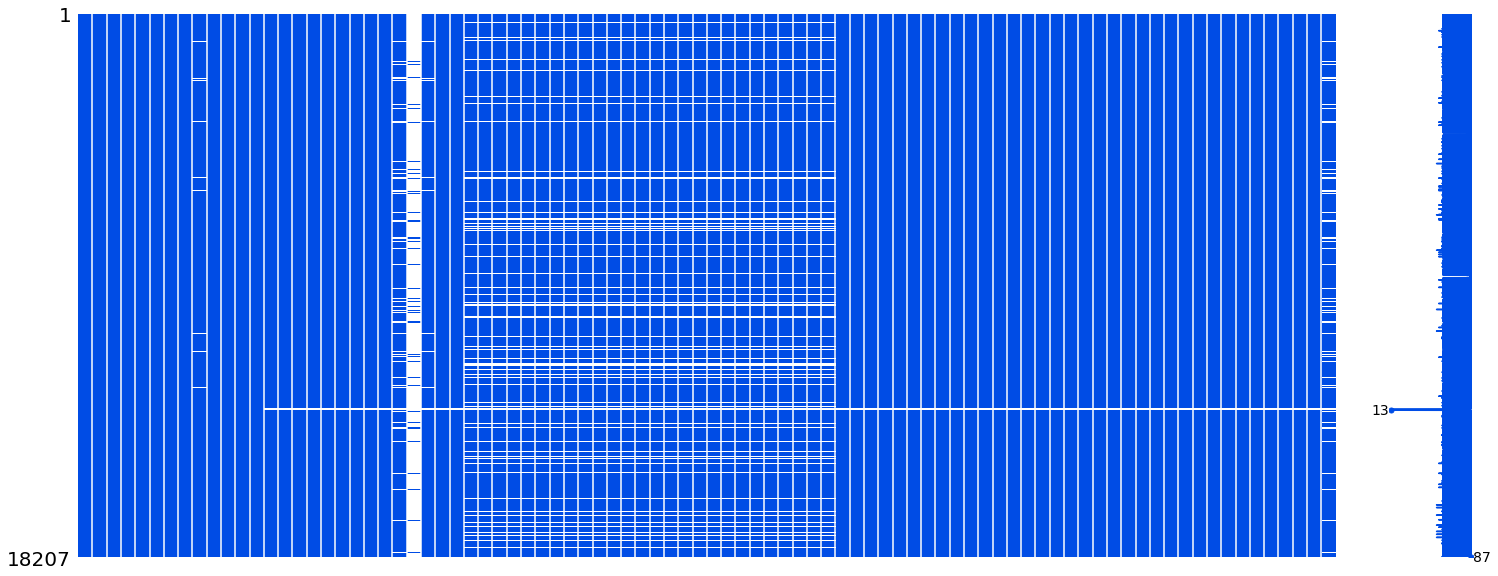

In [8]:
#See see how null values look in dataframe
#Missing data as white lines 
import missingno as msno
msno.matrix(df,color=(0,0.3,0.9))

In [9]:
#Filtering data with null values for position

df_isnull = pd.isnull(df["LB"])
pos_null= df[df_isnull]
print(pos_null.shape)
print(pos_null.isnull().sum().sort_values(ascending= False))

(2085, 88)
LWB                         2085
LM                          2085
CB                          2085
LCB                         2085
LB                          2085
RWB                         2085
RDM                         2085
CDM                         2085
LDM                         2085
RM                          2085
RCM                         2085
CM                          2085
LCM                         2085
RAM                         2085
RB                          2085
CAM                         2085
LAM                         2085
RW                          2085
RF                          2085
CF                          2085
LF                          2085
LW                          2085
RS                          2085
ST                          2085
LS                          2085
RCB                         2085
Loaned From                 1996
Release Clause               185
Joined                       182
Contract Valid Until          93

### Position, Jersey number and all players rating attributes have all the null values in this subset (as found in the both anomaly detection- Null value)
## Hence, they can be dropped

In [10]:
#Filtering relevant data & checking for club null values

df_notnull = pd.notnull(df["LB"])
df= df[df_notnull]

df_isnull = pd.isnull(df["Club"])
pos_null= df[df_isnull]
print(pos_null.shape)
print(pos_null.isnull().sum().sort_values(ascending= False))

(196, 88)
Release Clause              196
Club                        196
Contract Valid Until        196
Joined                      196
Loaned From                 196
LM                            0
LW                            0
RCM                           0
Height                        0
Weight                        0
LS                            0
ST                            0
RS                            0
LF                            0
RAM                           0
CF                            0
CM                            0
RW                            0
LCM                           0
LAM                           0
CAM                           0
RF                            0
Jersey Number                 0
GKReflexes                    0
Value                         0
Name                          0
Age                           0
Photo                         0
Nationality                   0
Flag                          0
Overall                       

### Release clause, club, contract valid until, joined have the same number of missing values- Club related info is absent, hence irrelevant for our model and can be dropped

In [11]:
df_notnull = pd.notnull(df["Club"])
df= df[df_notnull]
print(df.shape)
print(df.isnull().sum().sort_values(ascending= False))

(15926, 88)
Loaned From                 14751
Release Clause               1183
Joined                       1175
CM                              0
LW                              0
RCM                             0
Contract Valid Until            0
Height                          0
Weight                          0
LS                              0
ST                              0
RS                              0
LF                              0
LCM                             0
GKReflexes                      0
RF                              0
RW                              0
LAM                             0
CAM                             0
RAM                             0
LM                              0
CF                              0
Jersey Number                   0
Position                        0
Club Logo                       0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Fl

### Remaining null values
#### 1) As stated earlier, a big chunk of players are not loaned to other clubs, hence there are 16943 (now 14751) missing values out of 18206 (now 15926) i.e. they play for their own clubs.
#### 2) There might not be any release clause set in the player contract and the player might be academy produced- hence no info on Joined is available.

#### And it is okay to move forward with this dataset.

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15926 entries, 0 to 18206
Data columns (total 88 columns):
ID                          15926 non-null int64
Name                        15926 non-null object
Age                         15926 non-null int64
Photo                       15926 non-null object
Nationality                 15926 non-null object
Flag                        15926 non-null object
Overall                     15926 non-null int64
Potential                   15926 non-null int64
Club                        15926 non-null object
Club Logo                   15926 non-null object
Value                       15926 non-null object
Wage                        15926 non-null object
Special                     15926 non-null int64
Preferred Foot              15926 non-null object
International Reputation    15926 non-null float64
Weak Foot                   15926 non-null float64
Skill Moves                 15926 non-null float64
Work Rate                   15926 non-null 

### Flags in data type
#### Height, Weight, Release clause should be int/float
#### Position ratings are objects, should be int

In [13]:

df[['Height_ft','Height_inch']] = df['Height'].str.split("'",expand=True)
df["Height"]= 2.54*(df["Height_inch"].astype(str).astype(int))+30.48 *(df["Height_ft"].astype(str).astype(int))
df= df.drop(columns= ['Height_ft','Height_inch'])

df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'], dtype='o

In [14]:
df["Weight"]= df["Weight"].str.split("lbs", n = 1, expand = True)
df["Weight"].astype(str).astype(int)

0        159
1        183
2        150
4        154
5        163
        ... 
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 15926, dtype: int64

In [15]:
df[['a','Release Clause']] = df['Release Clause'].str.split("€",expand=True)
#df[['Release Clause','b']] = df['b'].str.split("M",expand=True)
df= df.drop(columns= ['a'])
df["Release Clause"]= df["Release Clause"].replace(regex=['k'], value='000')
df["Release Clause"]= df["Release Clause"].replace(regex=['K'], value='000')
df["Release Clause"]= df["Release Clause"].replace(regex=['M'], value='000000')
df["Release Clause"]=df["Release Clause"].astype(str).astype(float)
df["Release Clause"]=df["Release Clause"]/1000000
df.head()


ID               Name  Age                                           Photo Nationality                                 Flag  Overall  Potential                 Club                                     Club Logo    Value   Wage  Special Preferred Foot  International Reputation  Weak Foot  Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number        Joined Loaned From Contract Valid Until  Height Weight    LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  Composure  Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  Release Clause
0  158023           L. Messi   31  https://cdn.sofifa.org/players/4/19/158023.png   Argentina  https://cdn.sofifa.org/flags/52.png       94         94         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M  €565K     2202           Left                       5.0        4.0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   Jul 1, 2004         NaN                 2021  170.18    159  88+2  88+2  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2      84.0       95.0             70.0          90.0     86.0       97.0   93.0        94.0         87.0         96.0          91.0         86.0     91.0       95.0     95.0       85.0     68.0     72.0      59.0       94.0        48.0           22.0         94.0    94.0       75.0       96.0     33.0            28.0           26.0       6.0        11.0       15.0           14.0         8.0        0.000227
1   20801  Cristiano Ronaldo   33   https://cdn.sofifa.org/players/4/19/20801.png    Portugal  https://cdn.sofifa.org/flags/38.png       94         94             Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M  €405K     2228          Right                       5.0        4.0          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0  Jul 10, 2018         NaN                 2022  187.96    183  91+3  91+3  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3      84.0       94.0             89.0          81.0     87.0       88.0   81.0        76.0         77.0         94.0          89.0         91.0     87.0       96.0     70.0       95.0     95.0     88.0      79.0       93.0        63.0           29.0         95.0    82.0       85.0       95.0     28.0            31.0           23.0       7.0        11.0       15.0           14.0        11.0        0.000127
2  190871          Neymar Jr   26  https://cdn.sofifa.org/players/4/19/190871.png      Brazil  https://cdn.sofifa.org/flags/54.png       92         93  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  €118.5M  €290K     2143          Right                       5.0        5.0          5.0    High/ Medium      Neymar       Yes       LW           10.0   Aug 3, 2017         NaN                 2022  175.26    150  84+3  84+3  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3      79.0       87.0             62.0          84.0     84.0       96.0   88.0        87.0         78.0         95.0          94.0         90.0     96.0       94.0     84.0       80.0     61.0     81.0      49.0       82.0        56.0           36.0         89.0    87.0       81.0       94.0     27.0            24.0           33.0       9.0         9.0       15.0           15.0        11.0        0.000228
4  192985       K. 

In [16]:
df[['a','Value']] = df['Value'].str.split("€",expand=True)
df= df.drop(columns= ['a'])
df["Value"]= df["Value"].replace(regex=['k'], value='000')
df["Value"]= df["Value"].replace(regex=['K'], value='000')
df["Value"]= df["Value"].replace(regex=['M'], value='000000')
df["Value"]=df["Value"].astype(str).astype(float)
df["Value"]=df["Value"]/1000000
df.head()

ID               Name  Age                                           Photo Nationality                                 Flag  Overall  Potential                 Club                                     Club Logo       Value   Wage  Special Preferred Foot  International Reputation  Weak Foot  Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number        Joined Loaned From Contract Valid Until  Height Weight    LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  Composure  Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  \
0  158023           L. Messi   31  https://cdn.sofifa.org/players/4/19/158023.png   Argentina  https://cdn.sofifa.org/flags/52.png       94         94         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png    0.000111  €565K     2202           Left                       5.0        4.0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   Jul 1, 2004         NaN                 2021  170.18    159  88+2  88+2  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2      84.0       95.0             70.0          90.0     86.0       97.0   93.0        94.0         87.0         96.0          91.0         86.0     91.0       95.0     95.0       85.0     68.0     72.0      59.0       94.0        48.0           22.0         94.0    94.0       75.0       96.0     33.0            28.0           26.0       6.0        11.0       15.0           14.0         8.0   
1   20801  Cristiano Ronaldo   33   https://cdn.sofifa.org/players/4/19/20801.png    Portugal  https://cdn.sofifa.org/flags/38.png       94         94             Juventus   https://cdn.sofifa.org/teams/2/light/45.png   77.000000  €405K     2228          Right                       5.0        4.0          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0  Jul 10, 2018         NaN                 2022  187.96    183  91+3  91+3  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3      84.0       94.0             89.0          81.0     87.0       88.0   81.0        76.0         77.0         94.0          89.0         91.0     87.0       96.0     70.0       95.0     95.0     88.0      79.0       93.0        63.0           29.0         95.0    82.0       85.0       95.0     28.0            31.0           23.0       7.0        11.0       15.0           14.0        11.0   
2  190871          Neymar Jr   26  https://cdn.sofifa.org/players/4/19/190871.png      Brazil  https://cdn.sofifa.org/flags/54.png       92         93  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png    0.000118  €290K     2143          Right                       5.0        5.0          5.0    High/ Medium      Neymar       Yes       LW           10.0   Aug 3, 2017         NaN                 2022  175.26    150  84+3  84+3  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3      79.0       87.0             62.0          84.0     84.0       96.0   88.0        87.0         78.0         95.0          94.0         90.0     96.0       94.0     84.0       80.0     61.0     81.0      49.0       82.0        56.0           36.0         89.0    87.0       81.0       94.0     27.0            24.0           33.0       9.0         9.0       15.0           15.0        11.0   
4  192985       K. De Bruyne   27  https://cdn.sofifa.org/p

In [17]:

df["Wage"]= df["Wage"].replace(regex=['k'], value='000')
df["Wage"]= df["Wage"].replace(regex=['K'], value='000')
df["Wage"]= df["Wage"].replace(regex=['M'], value='000000')
df[["b",'Wage']] = df['Wage'].str.split("€",expand=True)
df= df.drop(columns= ['b'])


df["Wage"]=df["Wage"].astype(str).astype(float)
df.head()

ID               Name  Age                                           Photo Nationality                                 Flag  Overall  Potential                 Club                                     Club Logo       Value      Wage  Special Preferred Foot  International Reputation  Weak Foot  Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number        Joined Loaned From Contract Valid Until  Height Weight    LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  Composure  Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  \
0  158023           L. Messi   31  https://cdn.sofifa.org/players/4/19/158023.png   Argentina  https://cdn.sofifa.org/flags/52.png       94         94         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png    0.000111  565000.0     2202           Left                       5.0        4.0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   Jul 1, 2004         NaN                 2021  170.18    159  88+2  88+2  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2      84.0       95.0             70.0          90.0     86.0       97.0   93.0        94.0         87.0         96.0          91.0         86.0     91.0       95.0     95.0       85.0     68.0     72.0      59.0       94.0        48.0           22.0         94.0    94.0       75.0       96.0     33.0            28.0           26.0       6.0        11.0       15.0           14.0         8.0   
1   20801  Cristiano Ronaldo   33   https://cdn.sofifa.org/players/4/19/20801.png    Portugal  https://cdn.sofifa.org/flags/38.png       94         94             Juventus   https://cdn.sofifa.org/teams/2/light/45.png   77.000000  405000.0     2228          Right                       5.0        4.0          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0  Jul 10, 2018         NaN                 2022  187.96    183  91+3  91+3  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3      84.0       94.0             89.0          81.0     87.0       88.0   81.0        76.0         77.0         94.0          89.0         91.0     87.0       96.0     70.0       95.0     95.0     88.0      79.0       93.0        63.0           29.0         95.0    82.0       85.0       95.0     28.0            31.0           23.0       7.0        11.0       15.0           14.0        11.0   
2  190871          Neymar Jr   26  https://cdn.sofifa.org/players/4/19/190871.png      Brazil  https://cdn.sofifa.org/flags/54.png       92         93  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png    0.000118  290000.0     2143          Right                       5.0        5.0          5.0    High/ Medium      Neymar       Yes       LW           10.0   Aug 3, 2017         NaN                 2022  175.26    150  84+3  84+3  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3      79.0       87.0             62.0          84.0     84.0       96.0   88.0        87.0         78.0         95.0          94.0         90.0     96.0       94.0     84.0       80.0     61.0     81.0      49.0       82.0        56.0           36.0         89.0    87.0       81.0       94.0     27.0            24.0           33.0       9.0         9.0       15.0           15.0        11.0   
4  192985       K. De Bruyne   27  https://cdn.

In [18]:
#df["LS"]= df["LS"].str.split("+", n = 1, expand = True) 
#df["LS"]= df["LS"].astype(str).astype(int)
#df.shape

In [19]:
split= ["LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB",
        "LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB"]
df = df.apply(lambda x : x.str.split('+').str[0].astype(str).astype(int) if x.name in ["LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB",
        "LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB"] else x)
    
df.head()

ID               Name  Age                                           Photo Nationality                                 Flag  Overall  Potential                 Club                                     Club Logo       Value      Wage  Special Preferred Foot  International Reputation  Weak Foot  Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number        Joined Loaned From Contract Valid Until  Height Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  Composure  Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  Release Clause
0  158023           L. Messi   31  https://cdn.sofifa.org/players/4/19/158023.png   Argentina  https://cdn.sofifa.org/flags/52.png       94         94         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png    0.000111  565000.0     2202           Left                       5.0        4.0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   Jul 1, 2004         NaN                 2021  170.18    159  88  88  88  92  93  93  93  92   93   93   93  91   84  84   84  91   64   61   61   61   64  59   47  47   47  59      84.0       95.0             70.0          90.0     86.0       97.0   93.0        94.0         87.0         96.0          91.0         86.0     91.0       95.0     95.0       85.0     68.0     72.0      59.0       94.0        48.0           22.0         94.0    94.0       75.0       96.0     33.0            28.0           26.0       6.0        11.0       15.0           14.0         8.0        0.000227
1   20801  Cristiano Ronaldo   33   https://cdn.sofifa.org/players/4/19/20801.png    Portugal  https://cdn.sofifa.org/flags/38.png       94         94             Juventus   https://cdn.sofifa.org/teams/2/light/45.png   77.000000  405000.0     2228          Right                       5.0        4.0          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0  Jul 10, 2018         NaN                 2022  187.96    183  91  91  91  89  90  90  90  89   88   88   88  88   81  81   81  88   65   61   61   61   65  61   53  53   53  61      84.0       94.0             89.0          81.0     87.0       88.0   81.0        76.0         77.0         94.0          89.0         91.0     87.0       96.0     70.0       95.0     95.0     88.0      79.0       93.0        63.0           29.0         95.0    82.0       85.0       95.0     28.0            31.0           23.0       7.0        11.0       15.0           14.0        11.0        0.000127
2  190871          Neymar Jr   26  https://cdn.sofifa.org/players/4/19/190871.png      Brazil  https://cdn.sofifa.org/flags/54.png       92         93  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png    0.000118  290000.0     2143          Right                       5.0        5.0          5.0    High/ Medium      Neymar       Yes       LW           10.0   Aug 3, 2017         NaN                 2022  175.26    150  84  84  84  89  89  89  89  89   89   89   89  88   81  81   81  88   65   60   60   60   65  60   47  47   47  60      79.0       87.0             62.0          84.0     84.0       96.0   88.0        87.0         78.0         95.0          94.0         90.0     96.0       94.0     84.0       80.0     61.0     81.0      49.0       82.0        56.0           36.0         89.0    87.0       81.0       94.0     27.0            24.0           33.0       9.0         9.0       15.0           15.0        11.0        0.000228
4  192985       K. De Bruyne   27  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   https://cdn.sofifa.org/flags/7.png       91         92     

#### Data type is correct now, let's split the dataset as per the positions

In [20]:
df=df.fillna(0)

In [21]:
unique_position= df.Position.unique()
unique_position

array(['RF', 'ST', 'LW', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM',
       'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW',
       'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [22]:
# Creating subsets according to playing positions

attack = ["CF", "LF", "LS", "LW", "RF", "RS", "RW", "ST"]
# NOt in df_attack= df[~df.Position.isin(attack) ]
df_attack= df[df.Position.isin(attack) ]
print(df_attack.shape)

defense= ["RWB","RCB", "RB", "LWB","LCB", "LB","CB"]
df_defense= df[df.Position.isin(defense)]
print(df_defense.shape)

mid= ["RM","RDM","RCM","RAM","LM","LDM","LAM","LCM","CM","CDM","CAM"]
df_mid= df[df.Position.isin(mid)]
print(df_mid.shape)


gk= ["GK"]
df_gk= df[df.Position.isin(gk)]
print(df_gk.shape)


(3381, 88)
(5781, 88)
(6764, 88)
(0, 88)


**## df_defense can be used for the problem at hand as we require the replacement for Sergio Ramos, however we'll model both the dataframes: df(with all values) & df_defense

In [23]:
df_defense.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5781 entries, 8 to 18201
Data columns (total 88 columns):
ID                          5781 non-null int64
Name                        5781 non-null object
Age                         5781 non-null int64
Photo                       5781 non-null object
Nationality                 5781 non-null object
Flag                        5781 non-null object
Overall                     5781 non-null int64
Potential                   5781 non-null int64
Club                        5781 non-null object
Club Logo                   5781 non-null object
Value                       5781 non-null float64
Wage                        5781 non-null float64
Special                     5781 non-null int64
Preferred Foot              5781 non-null object
International Reputation    5781 non-null float64
Weak Foot                   5781 non-null float64
Skill Moves                 5781 non-null float64
Work Rate                   5781 non-null object
Body Type 

# EDA

In [24]:
#Defender with maximum Potential and Overall
print('Maximum Potential : '+str(df_defense.loc[df_defense['Potential'].idxmax()][1]))
print('Maximum Overall Ranking : '+str(df_defense.loc[df_defense['Overall'].idxmax()][1]))

Maximum Potential : S. Umtiti
Maximum Overall Ranking : Sergio Ramos


#### Ramos has the best Overall ranking

#### Dependent variable:'Value' a.k.a. Market Value
#### Independent variables (Numerical): 'Overall', 'Potential',  'Wage', "International Reputation", "Weak Foot", "Skill Moves","Work Rate", "LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB","LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB",'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'


count    15926.000000
mean         1.218861
std          4.352138
min          0.000000
25%          0.000006
50%          0.300000
75%          0.650000
max        102.000000
Name: Value, dtype: float64
Skewness: 9.254317
Kurtosis: 124.110198


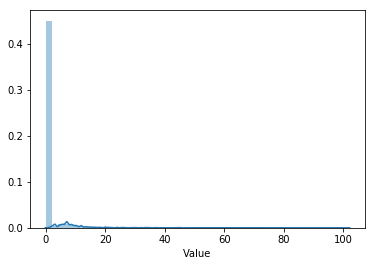

In [25]:
# Exploring dependent variable
print(df.Value.describe())
sns.distplot(df.Value);
#skewness and kurtosis
print("Skewness: %f" % df['Value'].skew())
print("Kurtosis: %f" % df['Value'].kurt())


#### The dependent variable is right skewed (highly),  and leptokurtic (kurtosis >3)- needs to be transformed

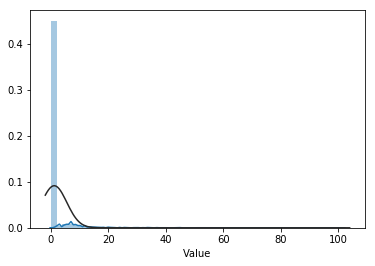

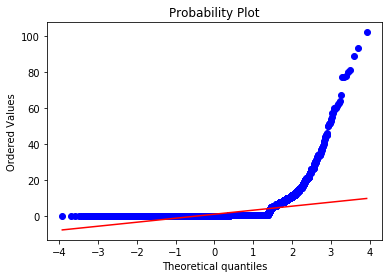

In [26]:
#histogram and normal probability plot
sns.distplot(df['Value'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Value'], plot=plt)

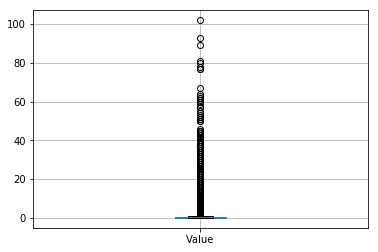

In [27]:
boxplot = df.boxplot(column=['Value'])

#### Relationship with numerical variables

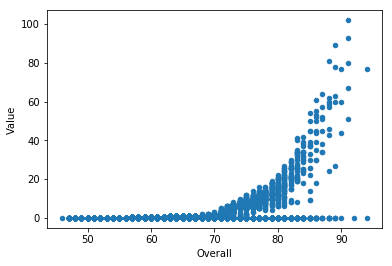

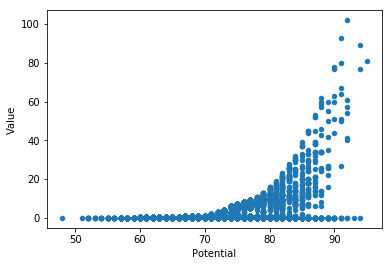

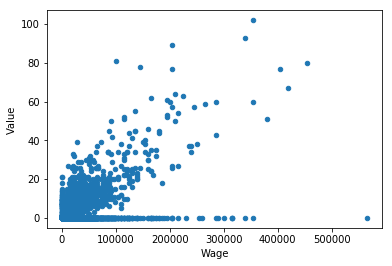

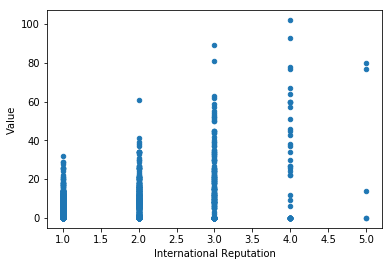

In [28]:
#scatter plot 
#### Independent variables (Numerical): 'Overall', 'Potential',  'Wage', "International Reputation", "Weak Foot", "Skill Moves","Work Rate", "LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB","LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB",'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'
#Using important variables

ind_var= ['Overall', 'Potential',  'Wage', "International Reputation"]
for x in ind_var:
    var = x
    data = pd.concat([df['Value'], df[var]], axis=1)
    data.plot.scatter(x=var, y='Value')

#### A lot of data in "Value" is concentrated near Zero
#### For Values near zero there is a large concentration of other independent variables

In [29]:
#df_defense_1= df_defense[df_defense.Overall>70] #N is equal in Overall>70
df_1= df[df.Value>10]
print(df_1.shape)
print(df.shape)

(408, 88)
(15926, 88)


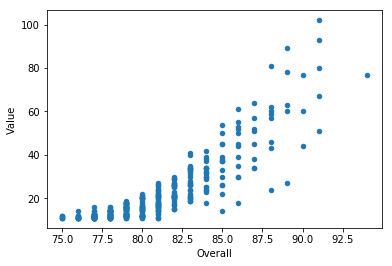

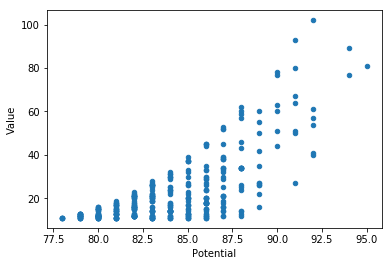

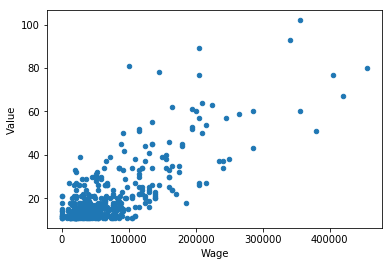

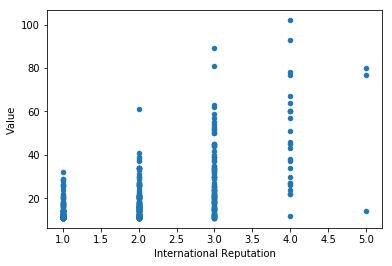

In [30]:
#scatter plot 
#### Independent variables (Numerical): 'Overall', 'Potential',  'Wage', "International Reputation", "Weak Foot", "Skill Moves","Work Rate", "LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB","LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB",'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'
ind_var= ['Overall', 'Potential',  'Wage', "International Reputation"]
for x in ind_var:
    var = x
    data = pd.concat([df_1['Value'], df_1[var]], axis=1)
    data.plot.scatter(x=var, y='Value')

#### For Value > 10 million there exist only 408 players and have a relationship close of linear (without a concentration around Zero).


(26, 88)
(15926, 88)
count    26.000000
mean     88.538462
std       2.139734
min      85.000000
25%      87.000000
50%      88.000000
75%      90.000000
max      94.000000
Name: Overall, dtype: float64


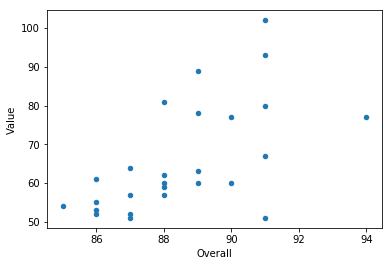

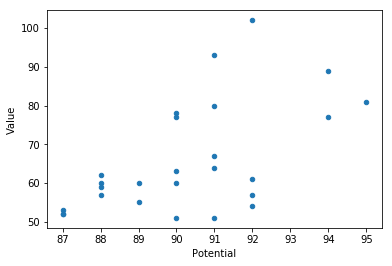

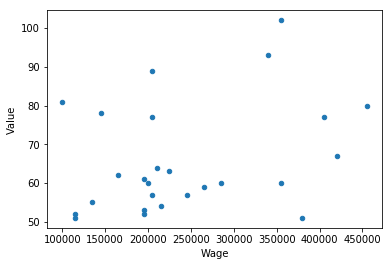

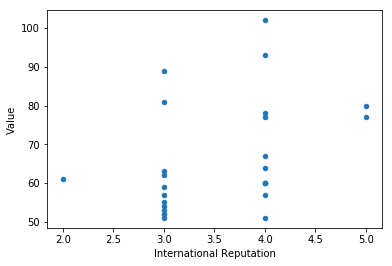

In [31]:
df_2= df[df["Overall"]>70]
df_2= df[df.Value>50]
print(df_2.shape)
print(df.shape)
print(df_2["Overall"].describe())

#scatter plot 
#### Independent variables (Numerical): 'Overall', 'Potential',  'Wage', "International Reputation", "Weak Foot", "Skill Moves","Work Rate", "LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB","LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB",'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'
ind_var= ['Overall', 'Potential',  'Wage', "International Reputation"]
for x in ind_var:
    var = x
    data = pd.concat([df_2['Value'], df_2[var]], axis=1)
    data.plot.scatter(x=var, y='Value')

(15441, 88)
(15926, 88)
count    15441.000000
mean        66.013600
std          6.426836
min         46.000000
25%         62.000000
50%         66.000000
75%         70.000000
max         94.000000
Name: Overall, dtype: float64


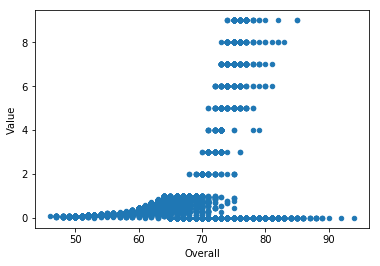

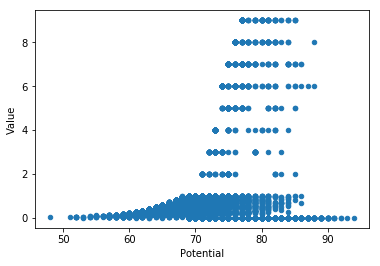

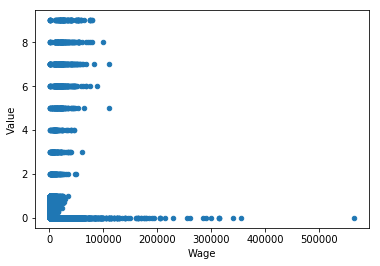

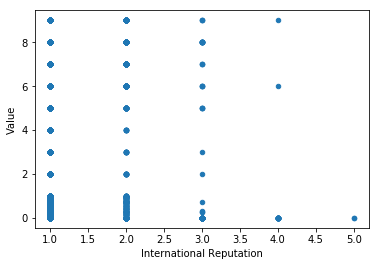

In [32]:
df_3= df[df.Value<10]
print(df_3.shape)
print(df.shape)
print(df_3["Overall"].describe())

#scatter plot 
#### Independent variables (Numerical): 'Overall', 'Potential',  'Wage', "International Reputation", "Weak Foot", "Skill Moves","Work Rate", "LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB","LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB",'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'
ind_var= ['Overall', 'Potential',  'Wage', "International Reputation"]
for x in ind_var:
    var = x
    data = pd.concat([df_3['Value'], df_3[var]], axis=1)
    data.plot.scatter(x=var, y='Value')

#### Values 0-1 million need to inspected further as there is high concentration there

(1363, 88)
(15926, 88)
count    1363.000000
mean       76.412326
std         3.935630
min        68.000000
25%        74.000000
50%        76.000000
75%        78.000000
max        94.000000
Name: Overall, dtype: float64


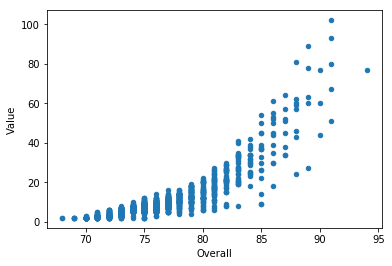

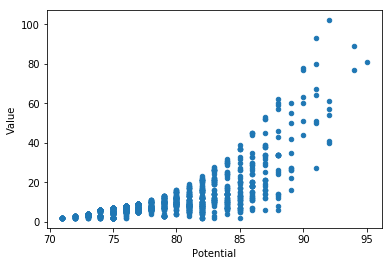

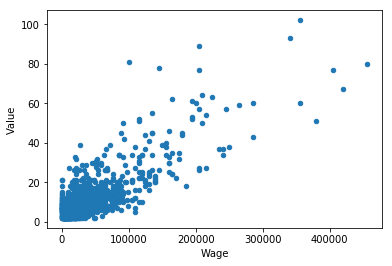

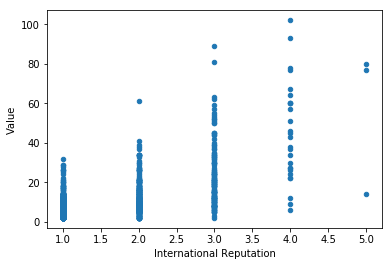

In [33]:
#df_defense_4= df_defense[df_defense["Overall"]<70]
df_4= df[df.Value>1]
print(df_4.shape)
print(df.shape)
print(df_4["Overall"].describe())

#scatter plot 
#### Independent variables (Numerical): 'Overall', 'Potential',  'Wage', "International Reputation", "Weak Foot", "Skill Moves","Work Rate", "LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB","LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB",'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'
ind_var= ['Overall', 'Potential',  'Wage', "International Reputation"]
for x in ind_var:
    var = x
    data = pd.concat([df_4['Value'], df_4[var]], axis=1)
    data.plot.scatter(x=var, y='Value')

#### There are only 1363 out of 15k(approx) players- 9% (approx.) which are valued above 1 million

(14265, 88)
(15926, 88)
count    14265.000000
mean        65.467578
std          6.305679
min         46.000000
25%         62.000000
50%         66.000000
75%         70.000000
max         94.000000
Name: Overall, dtype: float64


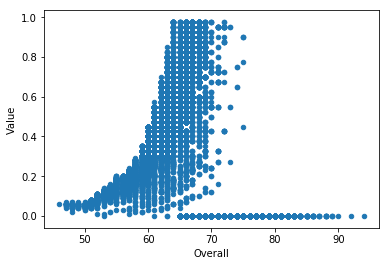

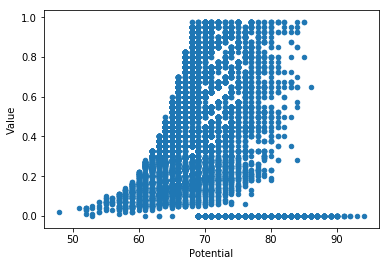

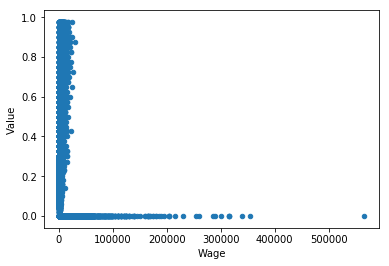

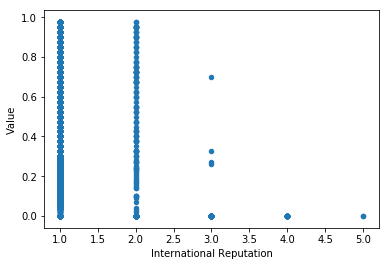

In [34]:
df_5= df[df.Value<1]
print(df_5.shape)
print(df.shape)
print(df_5["Overall"].describe())

#scatter plot 
#### Independent variables (Numerical): 'Overall', 'Potential',  'Wage', "International Reputation", "Weak Foot", "Skill Moves","Work Rate", "LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB","LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB",'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'
ind_var= ['Overall', 'Potential',  'Wage', "International Reputation"]
for x in ind_var:
    var = x
    data = pd.concat([df_5['Value'], df_5[var]], axis=1)
    data.plot.scatter(x=var, y='Value')

#### We need to dig more into this part of data :(

In [35]:
cut_labels=["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"]
cut_bins= [0,0.2,0.4,0.6,0.8,1]
df_5["Value_cuts"]= pd.cut(df_5["Value"], bins= cut_bins, labels= cut_labels)


In [36]:
df_5["Value_cuts"].value_counts(normalize=True)

0-0.2      0.480115
0.2-0.4    0.174511
0.4-0.6    0.154661
0.6-0.8    0.112857
0.8-1      0.077856
Name: Value_cuts, dtype: float64

In [37]:
print(df_5.groupby("Value_cuts")["Wage"].mean())
print(df_5.groupby("Value_cuts")["Overall"].mean())
print(df_5.groupby("Value_cuts")["Potential"].mean())
print(df_5.groupby("Value_cuts")["International Reputation"].value_counts(normalize=True))

Value_cuts
0-0.2      12654.492330
0.2-0.4     2067.926045
0.4-0.6     2790.476190
0.6-0.8     3777.501554
0.8-1       4845.045045
Name: Wage, dtype: float64
Value_cuts
0-0.2      67.002630
0.2-0.4    61.583601
0.4-0.6    64.108844
0.6-0.8    65.745805
0.8-1      67.000901
Name: Overall, dtype: float64
Value_cuts
0-0.2      72.386560
0.2-0.4    67.408360
0.4-0.6    69.148299
0.6-0.8    70.618397
0.8-1      71.854054
Name: Potential, dtype: float64
Value_cuts  International Reputation
0-0.2       1.0                         0.886486
            2.0                         0.091746
            3.0                         0.018846
            4.0                         0.002630
            5.0                         0.000292
0.2-0.4     1.0                         0.985932
            2.0                         0.012862
            3.0                         0.001206
0.4-0.6     1.0                         0.990930
            2.0                         0.009070
0.6-0.8     1.0      

#### 48% of data is in 1st bin (value 0-0.2) with a highest wage mean and highest mean overall ranking of 67 amongst the bins.

## It turns out there are many players which are under-valued and we might need to look into Overall Rank/Potential as our dependent variable

Skewness: 0.058749
Kurtosis: 0.145465


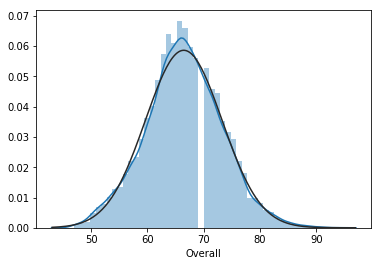

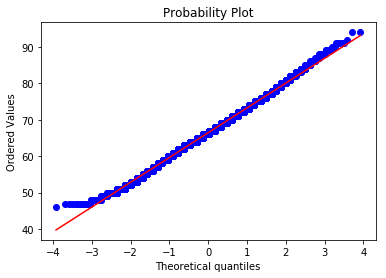

In [38]:
#histogram and normal probability plot
sns.distplot(df['Overall'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Overall'], plot=plt)

#skewness and kurtosis
print("Skewness: %f" % df['Overall'].skew())
print("Kurtosis: %f" % df['Overall'].kurt())


#### Since the skewness is between -2 to 2, it is near to symmetrical, but is platykurtic as kurtosis is <3

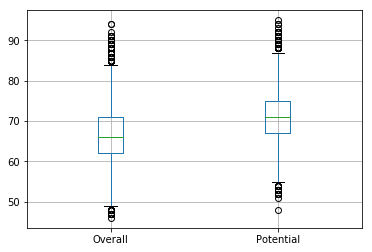

In [39]:
boxplot= df.boxplot(column=['Overall', 'Potential']);

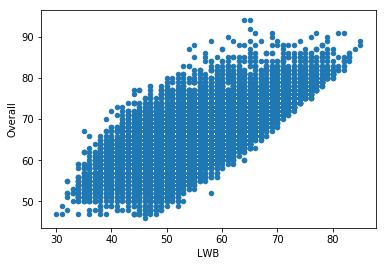

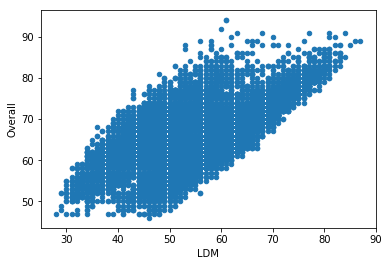

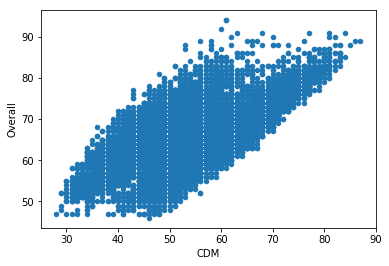

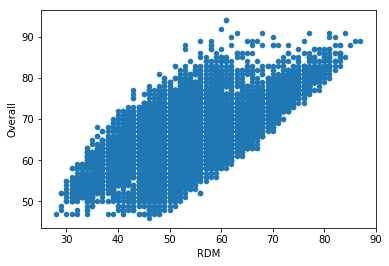

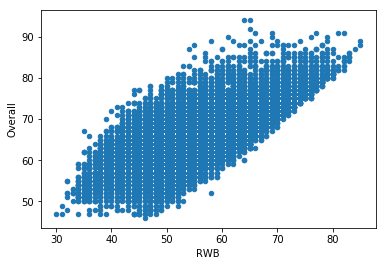

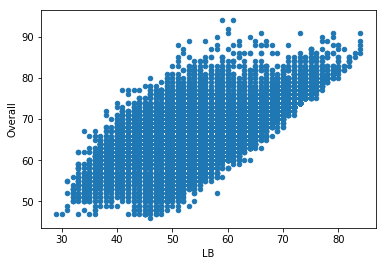

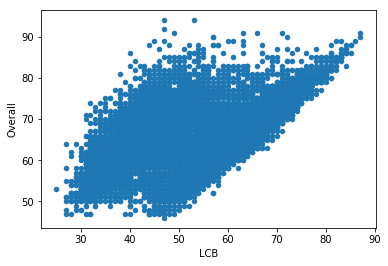

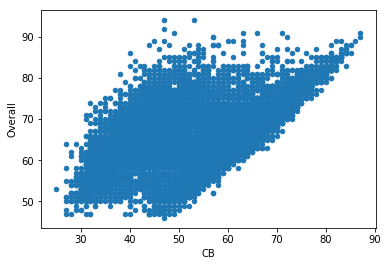

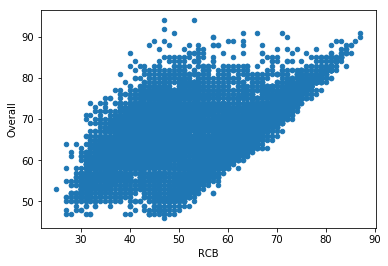

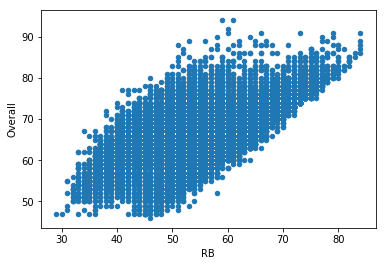

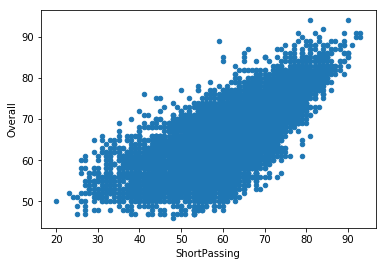

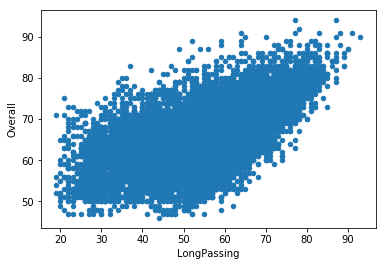

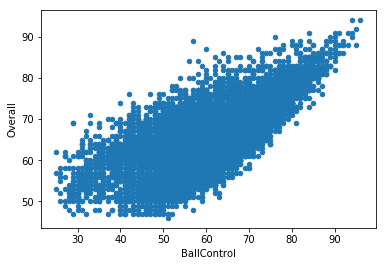

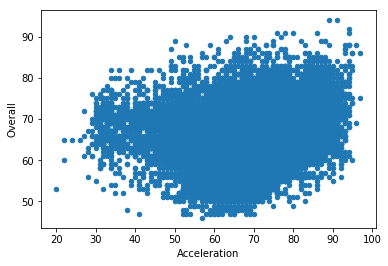

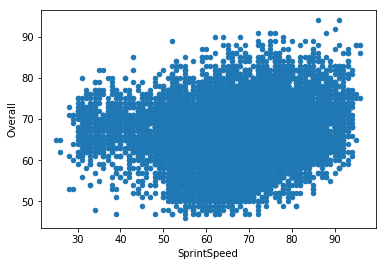

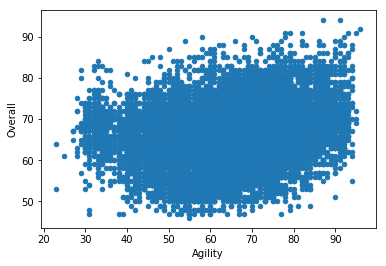

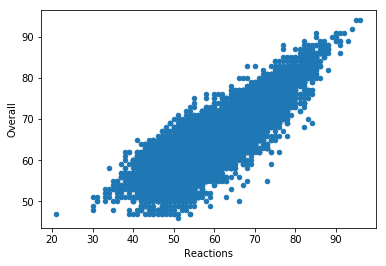

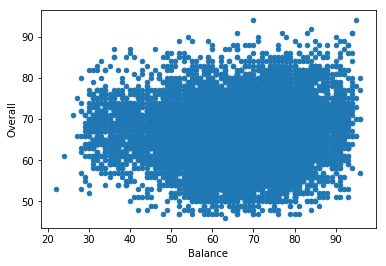

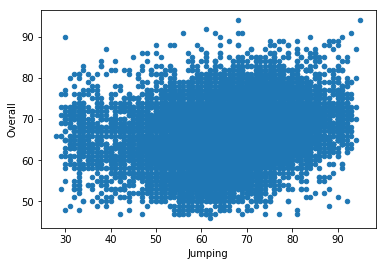

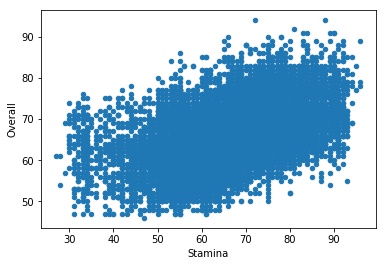

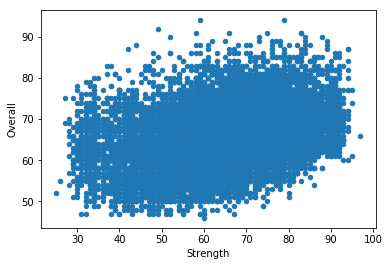

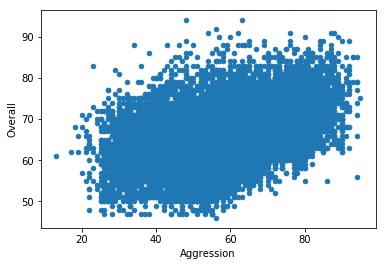

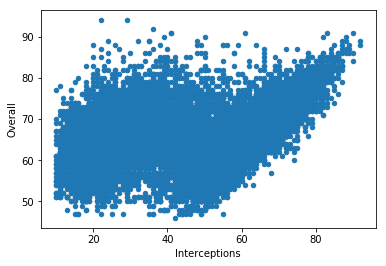

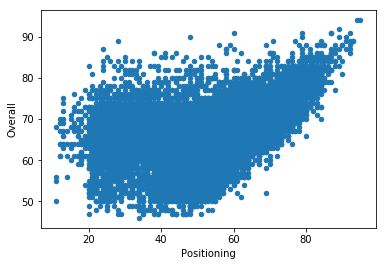

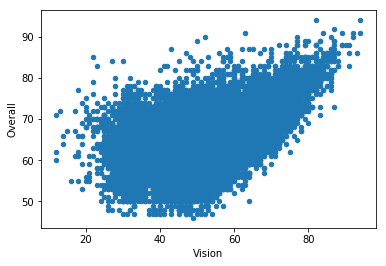

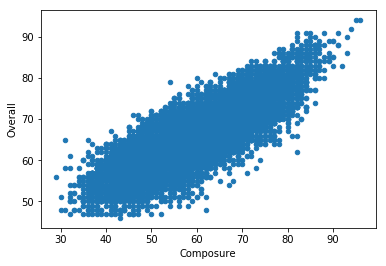

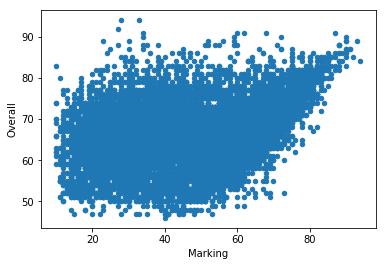

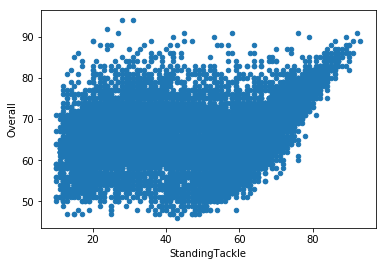

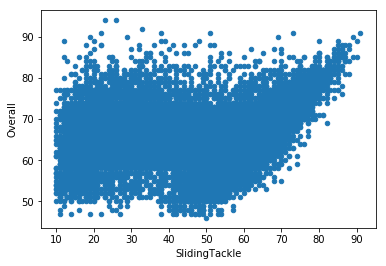

In [40]:
#Relationship with independent variables
#scatter plot 
#### Independent variables (Numerical):  'Potential',  'Wage', "International Reputation", "Weak Foot", "Skill Moves","Work Rate", 
####"LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB","LDM","CDM","RDM","RWB","LB","LCB",
####"CB","RCB","RB",'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'
ind_var= ["LWB","LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB",'ShortPassing',  'LongPassing', 
          'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',  
          'Jumping','Stamina', 'Strength', 'Aggression', 'Interceptions', 'Positioning', 
          'Vision', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle' ]
for x in ind_var:
    var = x
    data = pd.concat([df['Overall'], df[var]], axis=1)
    data.plot.scatter(x=var, y='Overall')

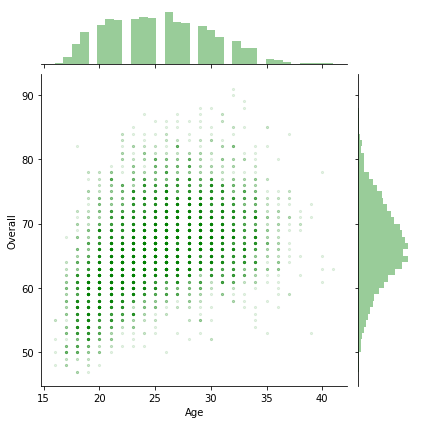

In [41]:
sns.jointplot(x=df_defense['Age'],y=df_defense['Overall'],
              joint_kws={'alpha':0.1,'s':5,'color':'Green'},
              marginal_kws={'color':'Green'})

#### The overall rating of players increase with age (till 29/30), however it starts to decrease after that.

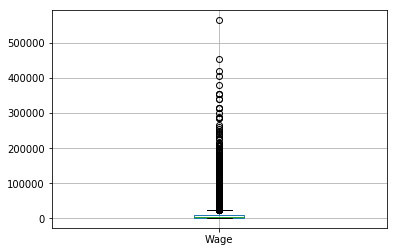

In [42]:

boxplot= df.boxplot(column=['Wage']);

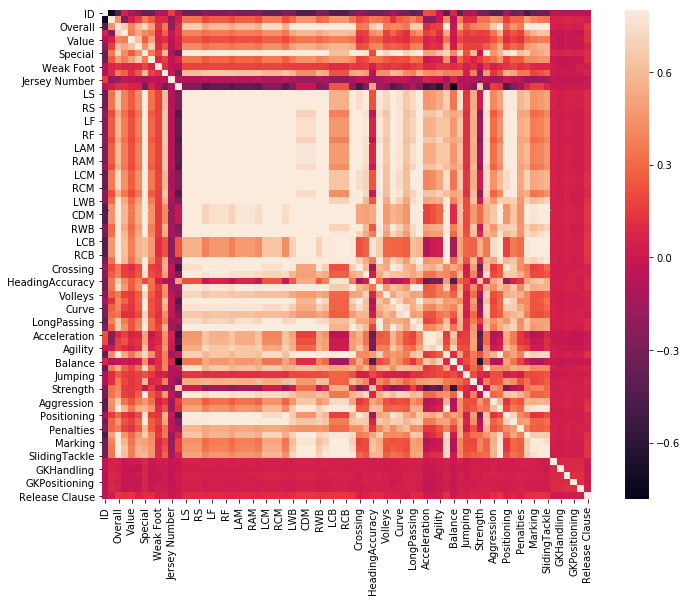

In [43]:
#correlation matrix
corrmat = df_defense.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

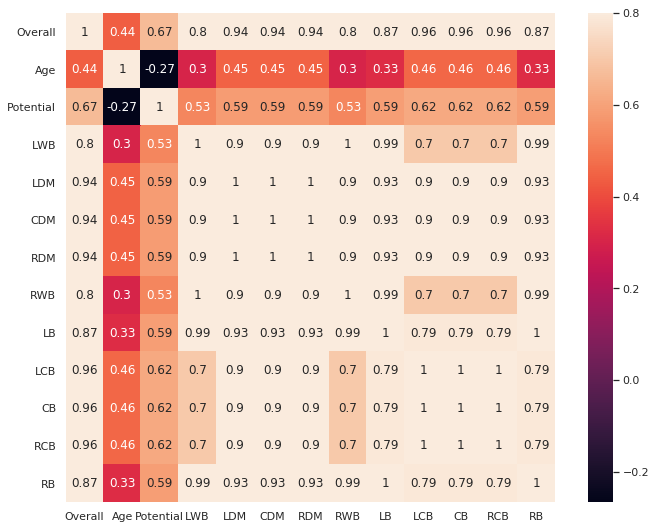

In [44]:
sns.set()

cols = df_defense[["Overall","Age", "Potential","LWB","LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB" ]]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True);

#### Since Ramos is "CB", which is high correlated with other independent variables here, we can use it individually

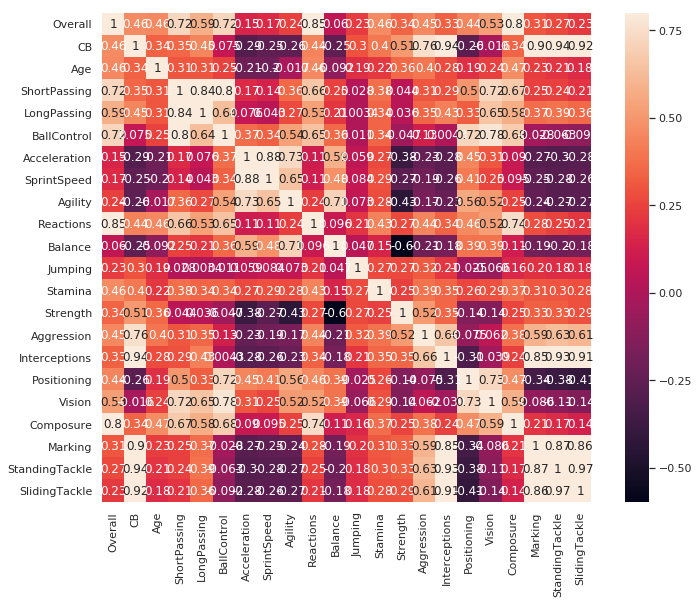

In [45]:
sns.set()

cols = df[["Overall","CB","Age",'ShortPassing',  'LongPassing', 'BallControl', 'Acceleration', 
                   'SprintSpeed', 'Agility', 'Reactions', 'Balance',  
          'Jumping','Stamina', 'Strength', 'Aggression', 'Interceptions', 'Positioning', 
          'Vision', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle'  ]]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True);

short passing & Long passing: Long passing (less with dep. variable); agility,acceleration & Sprint speed: Agility & Sprint speed; Ball control, composure: dropped; Interceptions, Marking, Standing tackele, sliding tackle: Sliding tackle

# Modeling

In [46]:
#Drop unnecessary columns

df_model= df_defense.drop(columns=['ID', 'Name', 'Photo', 'Nationality', 
                           'Flag','Club', 'Club Logo', 'Value','Wage', 
                           'Special', 'Preferred Foot','Weak Foot', 
                           'Skill Moves', 'Work Rate', 'Body Type',
                           'Real Face', 'Position', 'Jersey Number', 
                           'Joined', 'Loaned From', 'Contract Valid Until',
                           'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 
                           'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM','LM', 
                           'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 
                           'RDM', 'RWB', 'LB', 'LCB',  'RCB', 'RB','Crossing', 
                           'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',  
                           'Dribbling', 'Curve', 'FKAccuracy', 'BallControl', 'Acceleration',
                           'Reactions','ShotPower', 'LongShots',  'Interceptions', 'Penalties', 
                           'Marking','StandingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 
                           'GKPositioning', 'GKReflexes', 'Release Clause'])

In [47]:
df_model.columns

Index(['Age', 'Overall', 'Potential', 'International Reputation', 'CB', 'LongPassing', 'SprintSpeed', 'Agility', 'Balance', 'Jumping', 'Stamina', 'Strength', 'Aggression', 'Positioning', 'Vision', 'Composure', 'SlidingTackle'], dtype='object')

In [48]:
#Split Overall as a Target value
target = df_model.Overall
df_model2 = df_model.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_model2, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(1157, 16) (4624, 16)
(1157,) (4624,)


In [49]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.966662123830591
RMSE : 1.2291418348381842


In [50]:
#Using PermutationImportance to see important variables

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Using TensorFlow backend.


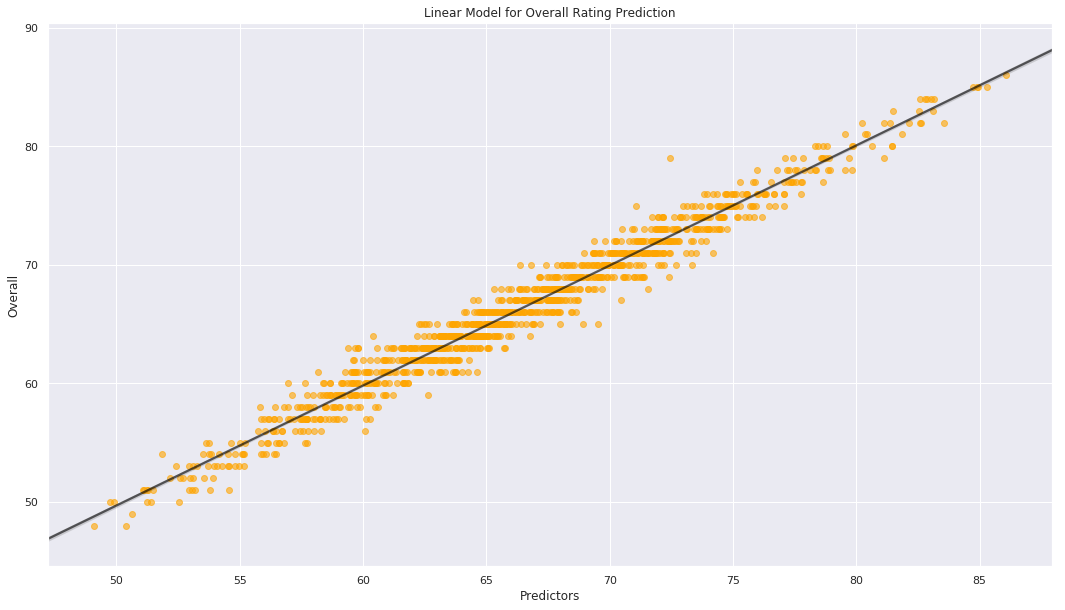

In [51]:
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'alpha':0.6,'color':'orange'},line_kws={'color':'black','alpha':0.6})
plt.xlabel("Predictors")
plt.ylabel('Overall')
plt.title("Linear Model for Overall Rating Prediction")
plt.show()

In [52]:
# However, we require a model for the master data set

In [53]:
df_model= df.drop(columns=['ID', 'Name', 'Photo', 'Nationality', 
                           'Flag','Club', 'Club Logo', 'Value','Wage', 
                           'Special', 'Preferred Foot','Weak Foot', 
                           'Skill Moves', 'Work Rate', 'Body Type',
                           'Real Face', 'Position', 'Jersey Number', 
                           'Joined', 'Loaned From', 'Contract Valid Until',
                           'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 
                           'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM','LM', 
                           'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 
                           'RDM', 'RWB', 'LB', 'LCB',  'RCB', 'RB','Crossing', 
                           'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',  
                           'Dribbling', 'Curve', 'FKAccuracy', 'BallControl', 'Acceleration',
                           'Reactions','ShotPower', 'LongShots',  'Interceptions', 'Penalties', 
                           'Marking','StandingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 
                           'GKPositioning', 'GKReflexes', 'Release Clause'])

In [54]:
#Split Overall as a Target value
target = df_model.Overall
df_model2 = df_model.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_model2, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3186, 16) (12740, 16)
(3186,) (12740,)


In [55]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9080273478419034
RMSE : 2.082288419762387


In [56]:
#Using PermutationImportance to see important variables

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

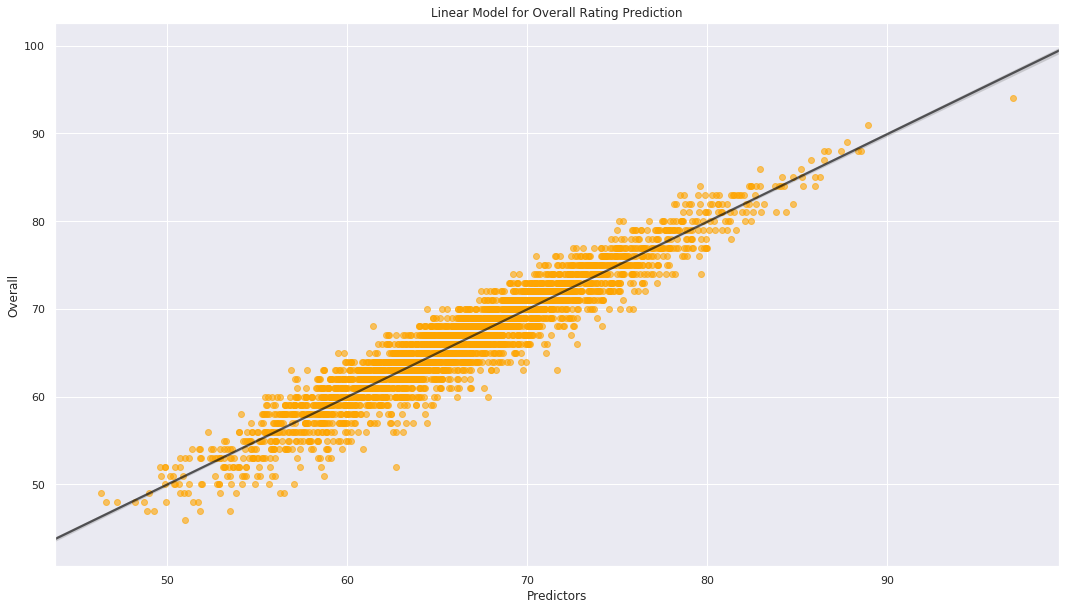

In [57]:
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'alpha':0.6,'color':'orange'},line_kws={'color':'black','alpha':0.6})
plt.xlabel("Predictors")
plt.ylabel('Overall')
plt.title("Linear Model for Overall Rating Prediction")
plt.show()

In [58]:
def get_mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = get_mape(y_test, predictions)
mape

2.527649626685383


## If you like the work, take a few seconds for giving this notebook UPVOTE. In case of any suggestions feel free to comment. I'll try to model on advance techniques as soon as possible. 